In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA



kdd_names_read = pd.read_csv('datasets/feature_names.csv', header=None)
kdd_names = kdd_names_read.iloc[:,0].values
kdd = pd.read_csv('datasets/kddcup.data_10_percent_corrected.csv', names=kdd_names)
kdd

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


In [2]:
print(kdd.columns)

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack_type'],
      dtype='object')


In [3]:
for i in range(len(kdd.columns)):
    if kdd.dtypes[i] == object:
        print(kdd.columns[i],end =": ")
        print(kdd[kdd.columns[i]].unique())

protocol_type: ['tcp' 'udp' 'icmp']
service: ['http' 'smtp' 'finger' 'domain_u' 'auth' 'telnet' 'ftp' 'eco_i' 'ntp_u'
 'ecr_i' 'other' 'private' 'pop_3' 'ftp_data' 'rje' 'time' 'mtp' 'link'
 'remote_job' 'gopher' 'ssh' 'name' 'whois' 'domain' 'login' 'imap4'
 'daytime' 'ctf' 'nntp' 'shell' 'IRC' 'nnsp' 'http_443' 'exec' 'printer'
 'efs' 'courier' 'uucp' 'klogin' 'kshell' 'echo' 'discard' 'systat'
 'supdup' 'iso_tsap' 'hostnames' 'csnet_ns' 'pop_2' 'sunrpc' 'uucp_path'
 'netbios_ns' 'netbios_ssn' 'netbios_dgm' 'sql_net' 'vmnet' 'bgp' 'Z39_50'
 'ldap' 'netstat' 'urh_i' 'X11' 'urp_i' 'pm_dump' 'tftp_u' 'tim_i' 'red_i']
flag: ['SF' 'S1' 'REJ' 'S2' 'S0' 'S3' 'RSTO' 'RSTR' 'RSTOS0' 'OTH' 'SH']
attack_type: ['normal.' 'buffer_overflow.' 'loadmodule.' 'perl.' 'neptune.' 'smurf.'
 'guess_passwd.' 'pod.' 'teardrop.' 'portsweep.' 'ipsweep.' 'land.'
 'ftp_write.' 'back.' 'imap.' 'satan.' 'phf.' 'nmap.' 'multihop.'
 'warezmaster.' 'warezclient.' 'spy.' 'rootkit.']


In [4]:
kdd_multiclass = kdd.copy()
dos   = ['neptune.', 'land.', 'pod.', 'smurf.', 'teardrop.', 'back.', 'worm.', 'udpstorm.', 'processtable.', 'apache2.']
probe = ['ipsweep.','satan.','nmap.','portsweep.','mscan.','saint.']
R2L   = ['ftp_write.','guess_passwd.', 'imap.','multihop.','phf.'
         ,'spy.','warezclient.','warezmaster.','snmpguess.','named.','xlock.','snmpgetattack.','httptunnel.','sendmail.']
U2R   = ['buffer_overflow.','loadmodule.','perl.','rootkit.','ps.','xterm.','sqlattack.']

kdd_multiclass['attack_type'].values[kdd_multiclass['attack_type'].isin(dos)] = 'dos'
kdd_multiclass['attack_type'].values[kdd_multiclass['attack_type'].isin(probe)] = 'probe'
kdd_multiclass['attack_type'].values[kdd_multiclass['attack_type'].isin(R2L)] = 'R2L'
kdd_multiclass['attack_type'].values[kdd_multiclass['attack_type'].isin(U2R)] = 'U2R'

In [5]:
for i in range(len(kdd_multiclass.columns)):
    if kdd_multiclass.dtypes[i] == object:
        print(kdd_multiclass.columns[i],end =": ")
        print(kdd_multiclass[kdd_multiclass.columns[i]].unique())

protocol_type: ['tcp' 'udp' 'icmp']
service: ['http' 'smtp' 'finger' 'domain_u' 'auth' 'telnet' 'ftp' 'eco_i' 'ntp_u'
 'ecr_i' 'other' 'private' 'pop_3' 'ftp_data' 'rje' 'time' 'mtp' 'link'
 'remote_job' 'gopher' 'ssh' 'name' 'whois' 'domain' 'login' 'imap4'
 'daytime' 'ctf' 'nntp' 'shell' 'IRC' 'nnsp' 'http_443' 'exec' 'printer'
 'efs' 'courier' 'uucp' 'klogin' 'kshell' 'echo' 'discard' 'systat'
 'supdup' 'iso_tsap' 'hostnames' 'csnet_ns' 'pop_2' 'sunrpc' 'uucp_path'
 'netbios_ns' 'netbios_ssn' 'netbios_dgm' 'sql_net' 'vmnet' 'bgp' 'Z39_50'
 'ldap' 'netstat' 'urh_i' 'X11' 'urp_i' 'pm_dump' 'tftp_u' 'tim_i' 'red_i']
flag: ['SF' 'S1' 'REJ' 'S2' 'S0' 'S3' 'RSTO' 'RSTR' 'RSTOS0' 'OTH' 'SH']
attack_type: ['normal.' 'U2R' 'dos' 'R2L' 'probe']


In [27]:
kdd_multi_encoded = pd.get_dummies(kdd_multiclass, columns=['protocol_type','service','flag'])
kdd_multi_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Columns: 119 entries, duration to flag_SH
dtypes: float64(15), int64(23), object(1), uint8(80)
memory usage: 184.7+ MB


In [41]:
kdd_multiclass.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [42]:
kdd_attacktype = kdd_multiclass.pop('attack_type')
kdd_multiclass['attack_type'] = kdd_attacktype

In [43]:
kdd_multiclass.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [44]:
x = kdd_multiclass.drop('attack_type', axis=1)
y = kdd_multiclass['attack_type']

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)
X_train.shape, X_test.shape

((345814, 41), (148207, 41))

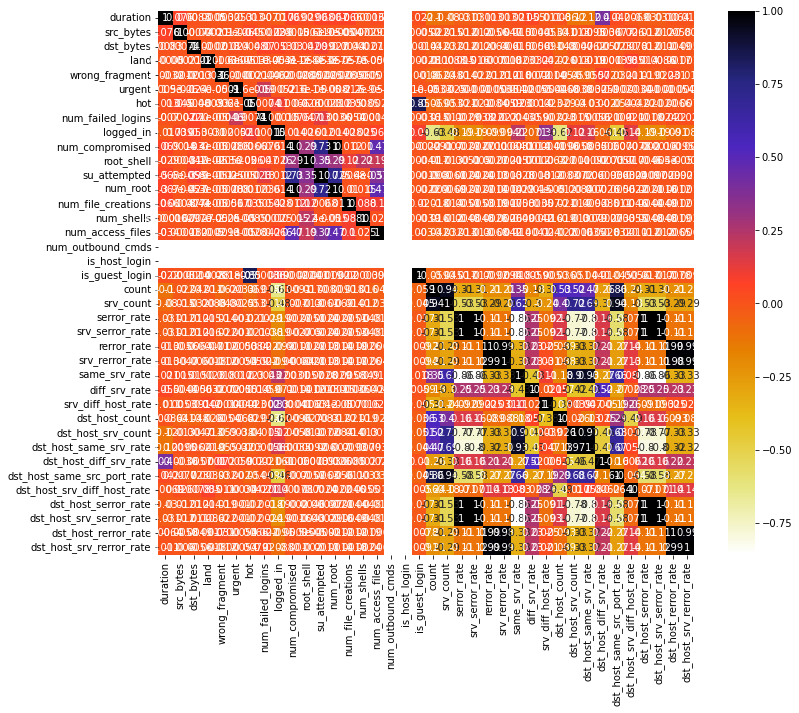

In [46]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

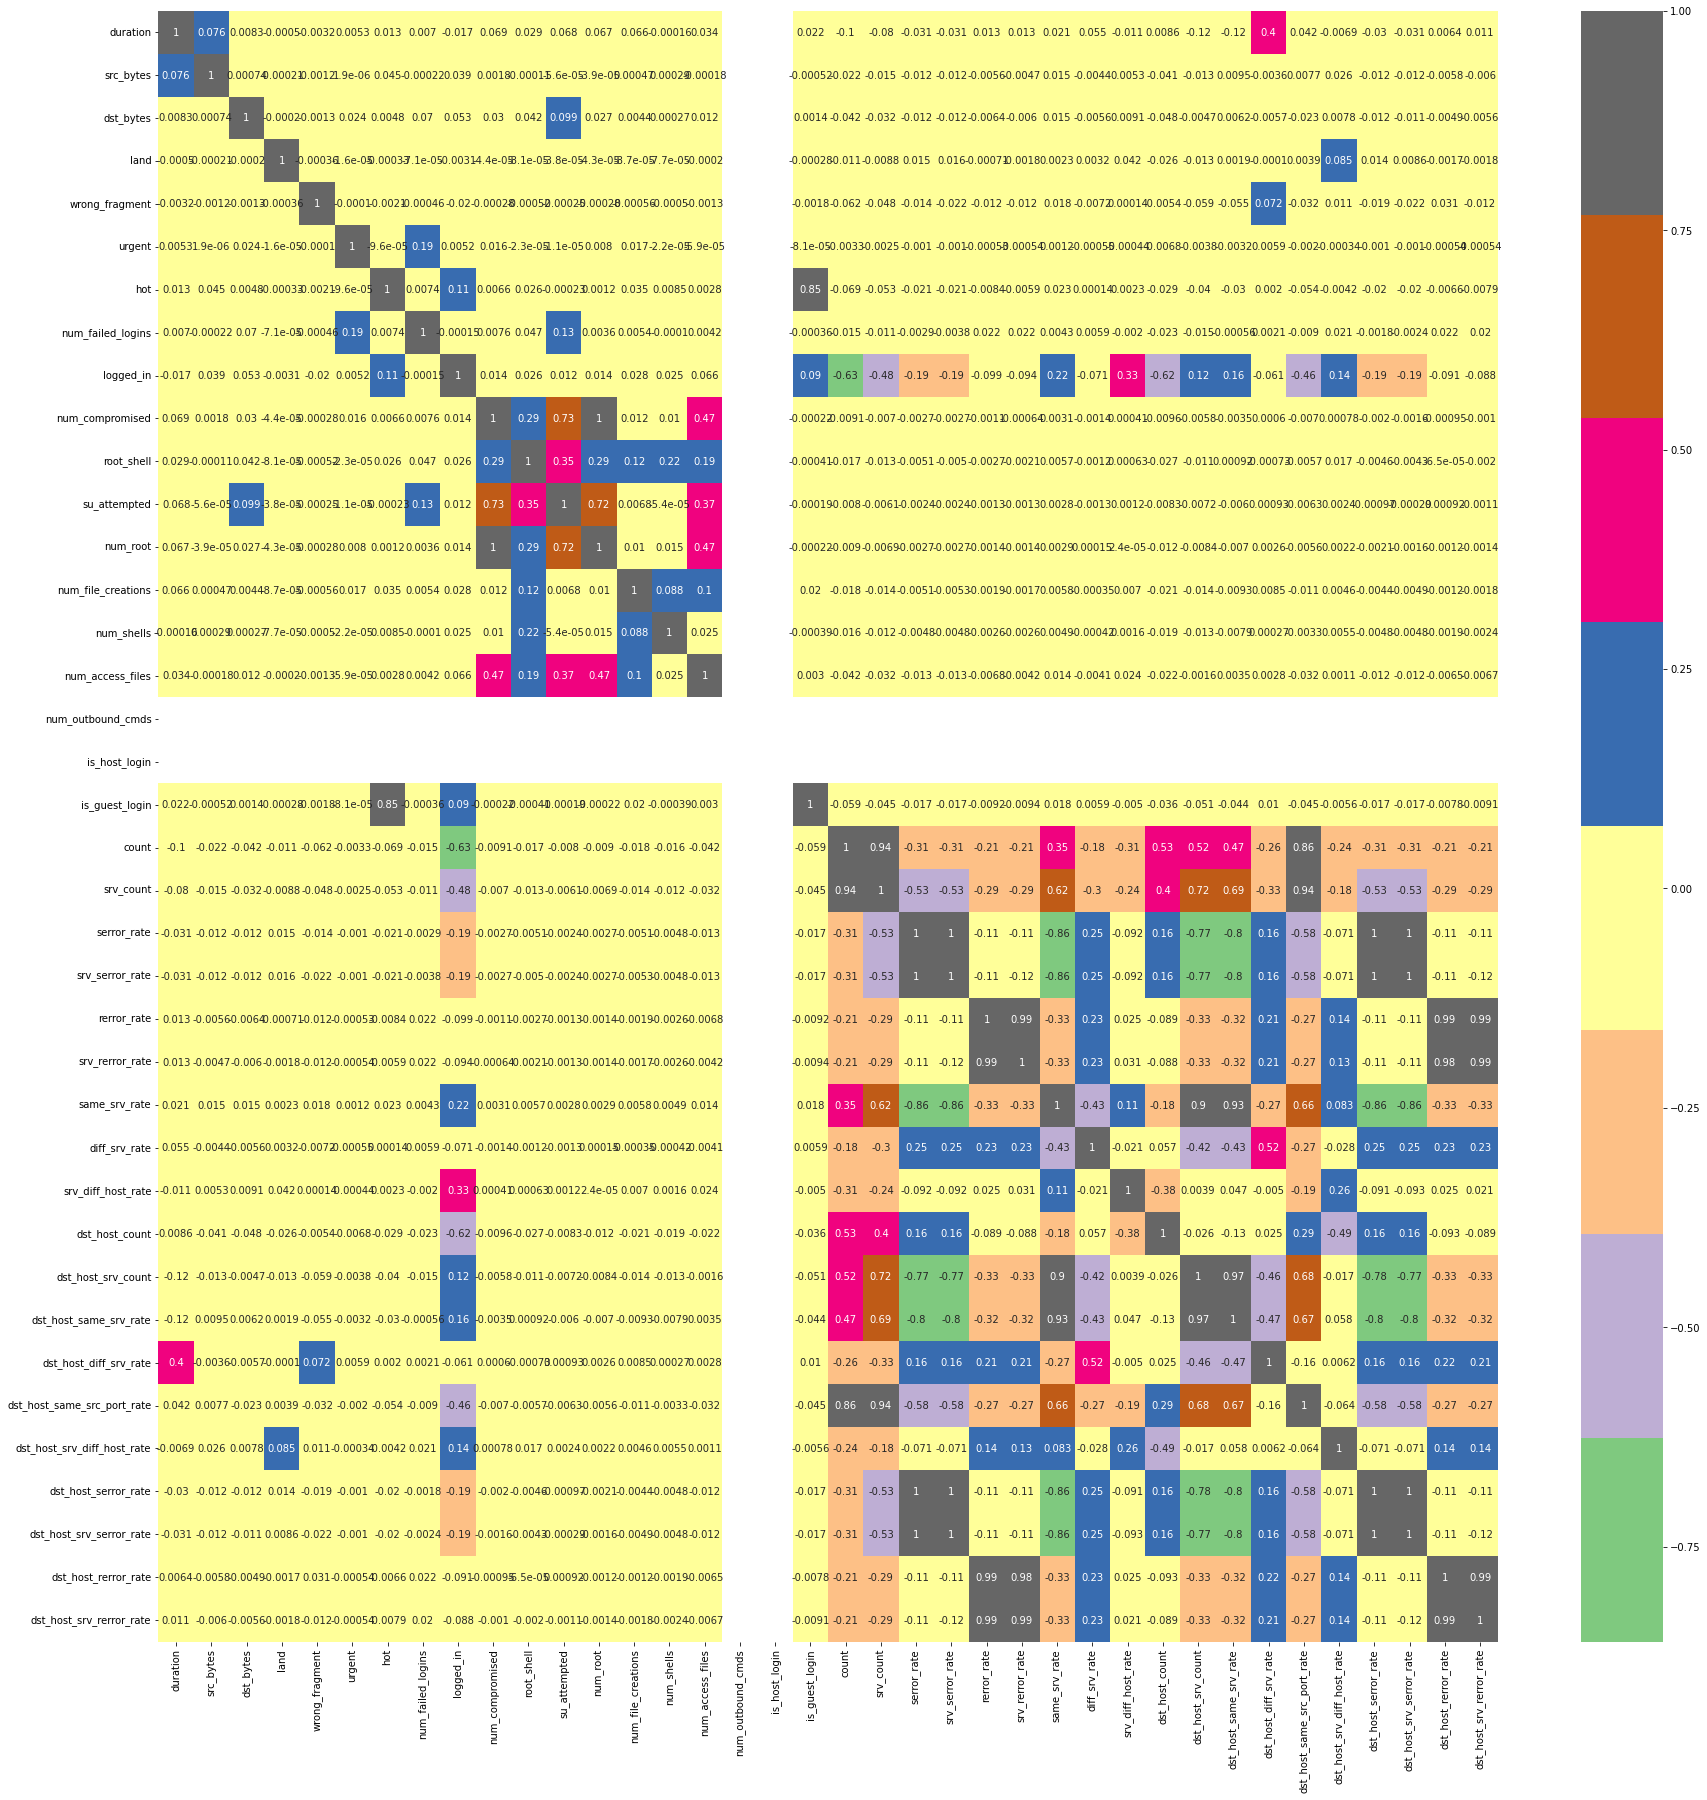

In [49]:
plt.figure(figsize=(30,30))
sns.heatmap(cor, annot=True, cmap=plt.cm.Accent)
plt.show()

In [7]:
kdd_normal = kdd_multi_encoded.pop('attack_type_normal.')
kdd_dos = kdd_multi_encoded.pop('attack_type_dos')
kdd_probe = kdd_multi_encoded.pop('attack_type_probe')
kdd_u2r = kdd_multi_encoded.pop('attack_type_U2R')
kdd_r2l = kdd_multi_encoded.pop('attack_type_R2L')

kdd_multi_encoded['normal'] = kdd_normal
kdd_multi_encoded['dos'] = kdd_dos
kdd_multi_encoded['probe'] = kdd_probe
kdd_multi_encoded['u2r'] = kdd_u2r
kdd_multi_encoded['r2l'] = kdd_r2l


In [8]:
count_normal = kdd_normal[kdd_normal == 1 ].count()
count_dos = kdd_dos[kdd_dos == 1 ].count()
count_probe = kdd_probe[kdd_probe == 1 ].count()
count_u2r = kdd_u2r[kdd_u2r == 1 ].count()
count_r2l = kdd_r2l[kdd_r2l == 1 ].count()
count_total = count_normal+count_dos+count_probe+count_u2r+count_r2l
count_attacks = count_total - count_normal

print("Normal:", count_normal)
print("DoS:", count_dos)
print("Probe:", count_probe)
print("U2R:", count_u2r)
print("R2L:", count_r2l)

print("Total",count_total)


Normal: 97278
DoS: 391458
Probe: 4107
U2R: 52
R2L: 1126
Total 494021


([<matplotlib.patches.Wedge at 0x1526cd79548>,
 [Text(-0.6958869977584448, 0.9776202158050633, 'Normal'),
  Text(0.662643862910721, -1.0004514535682167, 'DoS'),
  Text(0.053763422286368115, 1.5990964618884185, 'Probe, U2R, R2L')],
 [Text(-0.40593408202575937, 0.5702784592196202, '19.7%'),
  Text(0.3865422533645872, -0.5835966812481264, '79.2%'),
  Text(0.036962352821878076, 1.0993788175482875, '1.1%')])

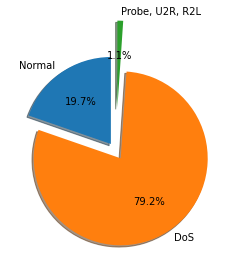

In [9]:
import matplotlib.pyplot as plt
labels = 'Normal','DoS','Probe, U2R, R2L'
sizes = [count_normal/count_total, count_dos/count_total, (count_probe+count_u2r+count_r2l)/count_total]
explode = (0.1, 0.1, .5)
fig1,ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, explode = explode, autopct='%1.1f%%',shadow=True, startangle=90)

In [10]:
kdd_corr = kdd_multi_encoded.corr()


In [11]:
kdd_corr_select = kdd_corr.drop( kdd_corr[ (abs(kdd_corr['normal']) < 0.1) 
                                         & (abs(kdd_corr['probe']) < 0.1)
                                         & (abs(kdd_corr['u2r']) < 0.1)
                                         & (abs(kdd_corr['r2l']) < 0.1)
                                         & (abs(kdd_corr['dos']) < 0.1)].index)

kdd_corr_select.drop(index=['num_outbound_cmds','is_host_login'], inplace=True)
kdd_corr_select


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,normal,dos,probe,u2r,r2l
duration,1.000000,0.004258,0.005440,-0.000452,-0.003235,0.003786,0.013213,0.005239,-0.017265,0.058095,...,-0.000728,-0.000456,0.002990,0.021548,-0.000998,0.118014,-0.132439,0.056540,0.000478,0.034561
dst_bytes,0.005440,-0.000002,1.000000,-0.000175,-0.001254,0.016288,0.004365,0.049330,0.047814,0.023298,...,0.008182,0.006520,0.000474,0.014036,-0.000387,0.037709,-0.048617,-0.002406,0.001327,0.103341
hot,0.013213,0.004483,0.004365,-0.000295,-0.002106,0.000356,1.000000,0.008740,0.105305,0.007348,...,0.000490,0.006376,0.003828,0.023071,-0.000650,0.006327,-0.058628,-0.003927,0.017964,0.449503
num_failed_logins,0.005239,-0.000027,0.049330,-0.000065,-0.000467,0.141996,0.008740,1.000000,-0.001145,0.006907,...,-0.000105,-0.000068,0.057936,-0.010307,-0.000144,0.001060,-0.019111,-0.000896,0.012613,0.152698
logged_in,-0.017265,0.001701,0.047814,-0.002784,-0.019908,0.006164,0.105305,-0.001145,1.000000,0.013612,...,0.023097,0.015890,0.006986,0.227275,-0.006140,0.795282,-0.784107,-0.037570,0.021262,0.104174
root_shell,0.021340,-0.000022,0.031680,-0.000070,-0.000504,0.034790,0.024065,0.036983,0.025293,0.255557,...,-0.000113,-0.000074,-0.000047,0.005831,-0.000155,0.005871,-0.020615,-0.000966,0.486117,0.023635
num_shells,-0.000169,0.000005,0.000144,-0.000066,-0.000473,-0.000026,0.006373,-0.000097,0.023776,0.009341,...,-0.000107,-0.000069,-0.000045,0.005482,-0.000146,0.014951,-0.019378,-0.000908,0.125231,0.014933
is_guest_login,0.023424,-0.000082,0.001289,-0.000249,-0.001778,-0.000096,0.843572,-0.000365,0.089318,-0.000212,...,0.004664,-0.000260,-0.000168,0.020336,-0.000548,0.032299,-0.072798,-0.003412,-0.000382,0.356408
count,-0.105153,-0.003098,-0.040373,-0.010260,-0.061934,-0.003997,-0.068451,-0.015184,-0.634643,-0.008792,...,-0.016511,-0.010696,-0.006955,0.392237,-0.022875,-0.752978,0.762798,-0.068880,-0.015715,-0.074217
srv_count,-0.080250,-0.002501,-0.030544,-0.007886,-0.047789,-0.003047,-0.052164,-0.011578,-0.478122,-0.006704,...,-0.012459,-0.008101,-0.005277,0.634065,-0.017129,-0.566829,0.586434,-0.106098,-0.012148,-0.056381


In [12]:
kdd_cov = kdd_multi_encoded.cov()


In [13]:
corr_normal = kdd_corr_select.sort_values(by='normal')
corr_probe = kdd_corr_select.sort_values(by='probe')
corr_u2r = kdd_corr_select.sort_values(by='u2r')
corr_r2l = kdd_corr_select.sort_values(by='r2l')
corr_dos = kdd_corr_select.sort_values(by='dos')


corr_normal = corr_normal['normal']
corr_probe = corr_probe['probe']
corr_u2r =  corr_u2r['u2r']
corr_r2l = corr_r2l['r2l']
corr_dos = corr_dos['dos']

In [14]:
corr_normal.drop(corr_normal[abs(corr_normal) < 0.1].index, inplace=True)
corr_normal

dos                           -0.967386
count                         -0.752978
dst_host_count                -0.642110
srv_count                     -0.566829
service_ecr_i                 -0.566108
protocol_type_icmp            -0.561605
dst_host_same_src_port_rate   -0.481458
flag_S0                       -0.228260
dst_host_srv_serror_rate      -0.227975
serror_rate                   -0.227739
dst_host_serror_rate          -0.227205
srv_serror_rate               -0.227189
service_private               -0.176534
dst_host_same_srv_rate         0.109950
dst_host_diff_srv_rate         0.115901
duration                       0.118014
service_ftp_data               0.150078
service_other                  0.178240
dst_host_srv_diff_host_rate    0.204958
flag_SF                        0.206691
service_domain_u               0.221276
same_srv_rate                  0.247405
service_smtp                   0.281568
srv_diff_host_rate             0.364687
protocol_type_udp              0.388491


In [15]:
print(abs(corr_normal).sort_values(ascending=False))

normal                         1.000000
dos                            0.967386
logged_in                      0.795282
count                          0.752978
service_http                   0.744731
dst_host_count                 0.642110
srv_count                      0.566829
service_ecr_i                  0.566108
protocol_type_icmp             0.561605
dst_host_same_src_port_rate    0.481458
protocol_type_tcp              0.412080
protocol_type_udp              0.388491
srv_diff_host_rate             0.364687
service_smtp                   0.281568
same_srv_rate                  0.247405
flag_S0                        0.228260
dst_host_srv_serror_rate       0.227975
serror_rate                    0.227739
dst_host_serror_rate           0.227205
srv_serror_rate                0.227189
service_domain_u               0.221276
flag_SF                        0.206691
dst_host_srv_diff_host_rate    0.204958
service_other                  0.178240
service_private                0.176534


In [16]:
corr_probe.drop(corr_probe[abs(corr_probe) < 0.1].index, inplace=True)
corr_probe

dos                           -0.178875
dst_host_srv_count            -0.117054
srv_count                     -0.106098
service_ecr_i                 -0.105062
srv_diff_host_rate             0.124320
flag_REJ                       0.128624
flag_SH                        0.154695
dst_host_rerror_rate           0.194635
srv_rerror_rate                0.200204
dst_host_srv_rerror_rate       0.201454
rerror_rate                    0.201491
service_other                  0.268284
dst_host_srv_diff_host_rate    0.396991
flag_RSTR                      0.401092
diff_srv_rate                  0.427723
dst_host_diff_srv_rate         0.468716
service_eco_i                  0.480043
probe                          1.000000
Name: probe, dtype: float64

In [17]:
print(abs(corr_probe).sort_values(ascending=False))

probe                          1.000000
service_eco_i                  0.480043
dst_host_diff_srv_rate         0.468716
diff_srv_rate                  0.427723
flag_RSTR                      0.401092
dst_host_srv_diff_host_rate    0.396991
service_other                  0.268284
rerror_rate                    0.201491
dst_host_srv_rerror_rate       0.201454
srv_rerror_rate                0.200204
dst_host_rerror_rate           0.194635
dos                            0.178875
flag_SH                        0.154695
flag_REJ                       0.128624
srv_diff_host_rate             0.124320
dst_host_srv_count             0.117054
srv_count                      0.106098
service_ecr_i                  0.105062
Name: probe, dtype: float64


In [18]:
corr_u2r.drop(corr_u2r[abs(corr_u2r) < 0.1].index, inplace=True)
corr_u2r

num_shells        0.125231
service_telnet    0.207959
root_shell        0.486117
u2r               1.000000
Name: u2r, dtype: float64

In [19]:
print(abs(corr_u2r).sort_values(ascending=False))

u2r               1.000000
root_shell        0.486117
service_telnet    0.207959
num_shells        0.125231
Name: u2r, dtype: float64


In [20]:
corr_r2l.drop(corr_r2l[abs(corr_r2l) < 0.1].index, inplace=True)
corr_r2l

dst_host_count      -0.112242
dst_bytes            0.103341
logged_in            0.104174
num_failed_logins    0.152698
service_ftp_data     0.315120
service_ftp          0.328919
is_guest_login       0.356408
hot                  0.449503
r2l                  1.000000
Name: r2l, dtype: float64

In [21]:
print(abs(corr_r2l).sort_values(ascending=False))

r2l                  1.000000
hot                  0.449503
is_guest_login       0.356408
service_ftp          0.328919
service_ftp_data     0.315120
num_failed_logins    0.152698
dst_host_count       0.112242
logged_in            0.104174
dst_bytes            0.103341
Name: r2l, dtype: float64


In [22]:
corr_dos.drop(corr_dos[abs(corr_dos) < 0.1].index, inplace=True)
corr_dos

normal                        -0.967386
logged_in                     -0.784107
service_http                  -0.720145
protocol_type_tcp             -0.422422
srv_diff_host_rate            -0.384788
protocol_type_udp             -0.380399
dst_host_srv_diff_host_rate   -0.301627
service_smtp                  -0.272504
same_srv_rate                 -0.234873
service_other                 -0.234429
dst_host_diff_srv_rate        -0.217985
service_domain_u              -0.214105
flag_SF                       -0.185490
service_ftp_data              -0.183180
probe                         -0.178875
duration                      -0.132439
service_eco_i                 -0.112819
service_private                0.172548
srv_serror_rate                0.230884
dst_host_serror_rate           0.230920
serror_rate                    0.231522
dst_host_srv_serror_rate       0.231595
flag_S0                        0.233490
dst_host_same_src_port_rate    0.472176
protocol_type_icmp             0.568528


In [23]:
print(abs(corr_dos).sort_values(ascending=False))

dos                            1.000000
normal                         0.967386
logged_in                      0.784107
count                          0.762798
service_http                   0.720145
dst_host_count                 0.663592
srv_count                      0.586434
service_ecr_i                  0.585322
protocol_type_icmp             0.568528
dst_host_same_src_port_rate    0.472176
protocol_type_tcp              0.422422
srv_diff_host_rate             0.384788
protocol_type_udp              0.380399
dst_host_srv_diff_host_rate    0.301627
service_smtp                   0.272504
same_srv_rate                  0.234873
service_other                  0.234429
flag_S0                        0.233490
dst_host_srv_serror_rate       0.231595
serror_rate                    0.231522
dst_host_serror_rate           0.230920
srv_serror_rate                0.230884
dst_host_diff_srv_rate         0.217985
service_domain_u               0.214105
flag_SF                        0.185490


In [24]:
%pwd

'C:\\Users\\Carlo\\CMPE_209_Group_1_Project'